# Pandas Teil 2

In diesem Teil sollen noch einige weitere Features von Pandas besprochen werden, darunter hauptsächlich die Fähigkeiten von Pandas rund um das Gruppieren von Daten

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fehlende Werte

Pandas hat eine Reihe von nützlichen Features zum Umgang mit fehlenden Werten - in Python werden diese meist als NaN codiert:

In [37]:
# Kombinieren von Datensätzen - Umgang mit fehlenden Werten
df1 = pd.DataFrame({'A': [1., np.nan, 3., 5., np.nan],
                    'B': [np.nan, 2., 3., np.nan, 6.]})

df2 = pd.DataFrame({'A': [5., 2., 4., np.nan, 3., 7.],
                    'B': [np.nan, np.nan, 3., 4., 6., 8.]})

print(df1)
print(df2)

     A    B
0  1.0  NaN
1  NaN  2.0
2  3.0  3.0
3  5.0  NaN
4  NaN  6.0
     A    B
0  5.0  NaN
1  2.0  NaN
2  4.0  3.0
3  NaN  4.0
4  3.0  6.0
5  7.0  8.0


In [38]:
# Zeilen mit fehlenden Werten wegwerfen
df1.dropna()

,A,B
2,3.0,3.0


In [39]:
# Zeilen auffüllen mit anderem Wert
df2.fillna(-99)

,A,B
0,5.0,-99.0
1,2.0,-99.0
2,4.0,3.0
3,-99.0,4.0
4,3.0,6.0
5,7.0,8.0


In [40]:
# Fehlende Werte interpolieren
df1.interpolate()

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.5
4,5.0,6.0


In [41]:
# fehlende Werte aus anderer Tabelle auffüllen
df1.combine_first(df2)

,A,B
0,1.0,NaN
1,2.0,2.0
2,3.0,3.0
3,5.0,4.0
4,3.0,6.0
5,7.0,8.0


## Daten gruppieren

Das Gruppieren von Daten in Pandas ist einfach zu verstehen, wenn man schon Gruppierungen in SQL gesehen hat. Zeilen werden bei der Gruppierung aufgrund eines Gruppenkriteriums zusammengefasst (z.B. gleiche Werte in einer bestimmten Spalte), und für die anderen Spalten wird eine Aggregatsfunktion angegeben, die vorgibt, wie die zusammengruppierten Werte zusammengefasst (= _aggregiert_) werden.

Beispiele:

In [42]:
df = pd.DataFrame({
    "projekt": [1,1,2,2,2],
    "art": ["Telefon", "Reise", "Telefon", "Reise", "Büromaterial"],
    "betrag": [50, 129, 34, 340, 12.99]
})
df

,projekt,art,betrag
0,1,Telefon,50.00
1,1,Reise,129.00
2,2,Telefon,34.00
3,2,Reise,340.00
4,2,Büromaterial,12.99


Verschiedene Schreibweisen der Aggregation:

In [43]:
df.groupby('projekt').agg('sum')
df.groupby('projekt').sum()
df.groupby('projekt').agg(np.sum)

,betrag
projekt,
1,179.00
2,386.99


Wir können dem Gruppierungsprozess zusehen, wenn wir eigene Funktionen für Gruppierung und Aggregation übergeben:

In [44]:
def gruppierung(i):
    print("Gruppierung von Zeile", i)
    return df.loc[i].projekt

def aggregation(a):
    print("Aggregation")
    print(a)
    return np.sum(a)

df.groupby(gruppierung).agg(aggregation)

Gruppierung von Zeile 0
Gruppierung von Zeile 1
Gruppierung von Zeile 2
Gruppierung von Zeile 3
Gruppierung von Zeile 4
Aggregation
0    1
1    1
Name: projekt, dtype: int64
Aggregation
2    2
3    2
4    2
Name: projekt, dtype: int64
Aggregation
0    Telefon
1      Reise
Name: art, dtype: object
Aggregation
2         Telefon
3           Reise
4    Büromaterial
Name: art, dtype: object
Aggregation
0     50.0
1    129.0
Name: betrag, dtype: float64
Aggregation
2     34.00
3    340.00
4     12.99
Name: betrag, dtype: float64


,projekt,art,betrag
1,2,TelefonReise,179.00
2,6,TelefonReiseBüromaterial,386.99


Welche Funktionen sind Aggregatsfunktionen? Die Dokumentation listet sie auf:
https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#aggregation

Betrachten wir das Objekt, welches wir nach dem Aufruf von `groupby` erhalten.

In [45]:
grouped = df.groupby('projekt')
type(grouped)

pandas.core.groupby.generic.DataFrameGroupBy

Dieses Objekt kann genutzt werden, um Gruppen zu durchlaufen, einzelne Gruppen zu erhalten oder verschiedene Aggregierungsfunktionen nacheinander aufzurufen:

In [46]:
for projekt, group in grouped:
    print(projekt)
    print(group)

1
   projekt      art  betrag
0        1  Telefon    50.0
1        1    Reise   129.0
2
   projekt           art  betrag
2        2       Telefon   34.00
3        2         Reise  340.00
4        2  Büromaterial   12.99


In [47]:
grouped.get_group(1)

,projekt,art,betrag
0,1,Telefon,50.0
1,1,Reise,129.0


In [48]:
grouped.describe()

betrag                                                            
         count        mean         std    min     25%   50%     75%    max
projekt                                                                   
1          2.0   89.500000   55.861436  50.00  69.750  89.5  109.25  129.0
2          3.0  128.996667  183.035953  12.99  23.495  34.0  187.00  340.0

In [49]:
grouped.min()

,art,betrag
projekt,,
1,Reise,50.00
2,Büromaterial,12.99


In [50]:
grouped.max()

,art,betrag
projekt,,
1,Telefon,129.0
2,Telefon,340.0


In [51]:
 grouped.agg([np.max, np.min, np.mean])

betrag                   
          amax   amin        mean
projekt                          
1        129.0  50.00   89.500000
2        340.0  12.99  128.996667

In [52]:
grouped.sum()

,betrag
projekt,
1,179.00
2,386.99


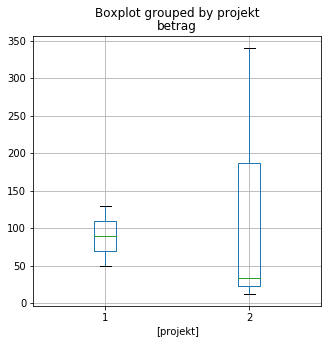

In [53]:
# Gruppierung kann auch bei Plots eingesetzt werden
df.boxplot(by='projekt', figsize=(5,5))

## pivot und melt

Betrachten wir folgende Tabelle:

In [54]:
N = 10
rng = np.arange(N)

# ewin paar Sensorwerte
df = pd.DataFrame({
    "time": pd.date_range('2018-07-09 10:00', periods=N, freq='10min'),
    "sensor1": np.sin(rng/5)+0.1*np.random.randn(N),
    "sensor2": np.sin(rng/3)+0.05*np.random.randn(N),
    "sensor3": np.cos(rng/3)+0.2*np.random.randn(N)
})

df

,time,sensor1,sensor2,sensor3
0,2018-07-09 10:00:00,-0.031205,0.038871,1.207618
1,2018-07-09 10:10:00,0.281657,0.287481,0.967182
2,2018-07-09 10:20:00,0.345467,0.677017,0.581291
3,2018-07-09 10:30:00,0.609497,0.925483,0.678254
4,2018-07-09 10:40:00,1.005721,1.046921,0.250921
5,2018-07-09 10:50:00,0.815169,1.012850,0.011828
6,2018-07-09 11:00:00,1.026210,0.811587,-0.256527
7,2018-07-09 11:10:00,0.931343,0.746315,-0.569113
8,2018-07-09 11:20:00,1.079876,0.410023,-0.784724
9,2018-07-09 11:30:00,1.034139,0.154541,-0.834035


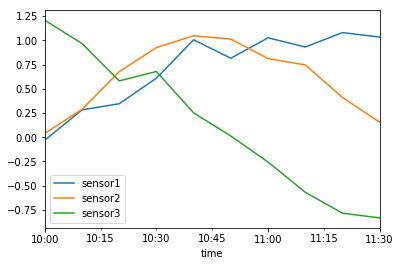

In [55]:
df.plot(x='time', y=['sensor1', 'sensor2', 'sensor3']);

Mit `melt` können wir Spalten in Zeilen umwandeln. Der erste Parameter von `melt` ist eine Spalte oder eine Lsite von Spalten die erhalten bleiben sollen. 

Dabei wird jede Spalte, die nicht erhalten bleiben soll, in eine Liste `(variable, value)` umgewandelt.

In [56]:
melted = df.melt(['time'])
melted


,time,variable,value
0,2018-07-09 10:00:00,sensor1,-0.031205
1,2018-07-09 10:10:00,sensor1,0.281657
2,2018-07-09 10:20:00,sensor1,0.345467
3,2018-07-09 10:30:00,sensor1,0.609497
4,2018-07-09 10:40:00,sensor1,1.005721
5,2018-07-09 10:50:00,sensor1,0.815169
6,2018-07-09 11:00:00,sensor1,1.026210
7,2018-07-09 11:10:00,sensor1,0.931343
8,2018-07-09 11:20:00,sensor1,1.079876
9,2018-07-09 11:30:00,sensor1,1.034139


Die umgekehrte Operation heisst `pivot`:

In [57]:
melted.pivot(index='time', columns='variable')

value                    
variable              sensor1   sensor2   sensor3
time                                             
2018-07-09 10:00:00 -0.031205  0.038871  1.207618
2018-07-09 10:10:00  0.281657  0.287481  0.967182
2018-07-09 10:20:00  0.345467  0.677017  0.581291
2018-07-09 10:30:00  0.609497  0.925483  0.678254
2018-07-09 10:40:00  1.005721  1.046921  0.250921
2018-07-09 10:50:00  0.815169  1.012850  0.011828
2018-07-09 11:00:00  1.026210  0.811587 -0.256527
2018-07-09 11:10:00  0.931343  0.746315 -0.569113
2018-07-09 11:20:00  1.079876  0.410023 -0.784724
2018-07-09 11:30:00  1.034139  0.154541 -0.834035

## Pivottabellen

Jetzt da wir die Pivot-Operation kennen, können wir uns auch eine Pivot-Tabelle erzeugen - es ist im Wesentlichen eine Pivot-Operation mit einer Gruppierung und einer Aggregation - ein einfaches Beispiel mit unserer Kostentabelle:

In [58]:
df_costs = pd.DataFrame({
    "projekt": [1,1,2,2,2],
    "art": ["Telefon", "Reise", "Telefon", "Reise", "Büromaterial"],
    "betrag": [50, 129, 34, 340, 12.99]
})

df_costs.pivot_table(index='projekt', values='betrag', aggfunc='sum')

# df_costs.pivot_table('betrag', 'projekt', aggfunc='mean')
# df_costs.pivot_table('betrag', 'projekt')

,betrag
projekt,
1,179.00
2,386.99


Mit unserer Sensortabelle können wir ein interessanteres Beispiel machen:

In [59]:
melted.set_index('time').pivot_table(
    index=pd.Grouper(freq='30min'),
    columns='variable', 
    aggfunc=['first', 'min', 'max'])

first                           min            \
                        value                         value             
variable              sensor1   sensor2   sensor3   sensor1   sensor2   
time                                                                    
2018-07-09 10:00:00 -0.031205  0.038871  1.207618 -0.031205  0.038871   
2018-07-09 10:30:00  0.609497  0.925483  0.678254  0.609497  0.925483   
2018-07-09 11:00:00  1.026210  0.811587 -0.256527  0.931343  0.410023   
2018-07-09 11:30:00  1.034139  0.154541 -0.834035  1.034139  0.154541   

                                    max                      
                                  value                      
variable              sensor3   sensor1   sensor2   sensor3  
time                                                         
2018-07-09 10:00:00  0.581291  0.345467  0.677017  1.207618  
2018-07-09 10:30:00  0.011828  1.005721  1.046921  0.678254  
2018-07-09 11:00:00 -0.784724  1.079876  0.811587 -0.256527  
2018-07-09 11:30:00 -0.834035  1.034139  0.154541 -0.834035

## Übung

Bearbeiten Sie in 2er-Teams die Übung "Pandas Übung 2".